In [5]:
from PIL import Image
import numpy as np
import os

# Corrigindo os diretórios para o notebook rodando em ms505/
input_base = os.path.join("original_data")
output_base = os.path.join("formated_data")

for split in ["Treino", "Teste"]:
    input_dir = os.path.join(input_base, split)
    output_dir = os.path.join(output_base, split)
    os.makedirs(output_dir, exist_ok=True)

    for filename in os.listdir(input_dir):
        if filename.endswith((".png", ".jpg", ".jpeg")):
            input_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, filename)

            img = Image.open(input_path).convert("L")
            img.save(output_path)
            print(f"Processado: {input_path} -> {output_path}")

Processado: original_data/Treino/c006_002.png -> formated_data/Treino/c006_002.png
Processado: original_data/Treino/c006_003.png -> formated_data/Treino/c006_003.png
Processado: original_data/Treino/c007_006.png -> formated_data/Treino/c007_006.png
Processado: original_data/Treino/c007_004.png -> formated_data/Treino/c007_004.png
Processado: original_data/Treino/c006_001.png -> formated_data/Treino/c006_001.png
Processado: original_data/Treino/c007_005.png -> formated_data/Treino/c007_005.png
Processado: original_data/Treino/c007_001.png -> formated_data/Treino/c007_001.png
Processado: original_data/Treino/c006_004.png -> formated_data/Treino/c006_004.png
Processado: original_data/Treino/c006_005.png -> formated_data/Treino/c006_005.png
Processado: original_data/Treino/c007_002.png -> formated_data/Treino/c007_002.png
Processado: original_data/Treino/c006_006.png -> formated_data/Treino/c006_006.png
Processado: original_data/Treino/c007_003.png -> formated_data/Treino/c007_003.png
Proc

Top 10 imagens por diferenÃ§a (R - max(G,B)):
c005_006.png: 122 r 53 g 5 b  (diff=69.1)
c005_002.png: 120 r 53 g 5 b  (diff=67.0)
c005_005.png: 123 r 57 g 4 b  (diff=66.6)
c005_001.png: 116 r 51 g 5 b  (diff=65.6)
c005_003.png: 124 r 61 g 4 b  (diff=62.6)
c009_006.png: 141 r 80 g 4 b  (diff=60.7)
c009_003.png: 140 r 80 g 3 b  (diff=60.5)
c009_002.png: 143 r 83 g 4 b  (diff=60.3)
c010_006.png: 114 r 54 g 6 b  (diff=60.0)
c010_002.png: 119 r 59 g 5 b  (diff=60.0)

Top 10 imagens por proporção de vermelho (R/(R+G+B)):
c005_001.png: 116 r 51 g 5 b  (ratio=0.678)
c005_006.png: 122 r 53 g 5 b  (ratio=0.677)
c005_002.png: 120 r 53 g 5 b  (ratio=0.675)
c005_005.png: 123 r 57 g 4 b  (ratio=0.670)
c010_004.png: 109 r 52 g 5 b  (ratio=0.656)
c005_003.png: 124 r 61 g 4 b  (ratio=0.654)
c010_005.png: 111 r 53 g 6 b  (ratio=0.654)
c010_006.png: 114 r 54 g 6 b  (ratio=0.653)
c010_003.png: 117 r 57 g 5 b  (ratio=0.652)
c010_002.png: 119 r 59 g 5 b  (ratio=0.649)


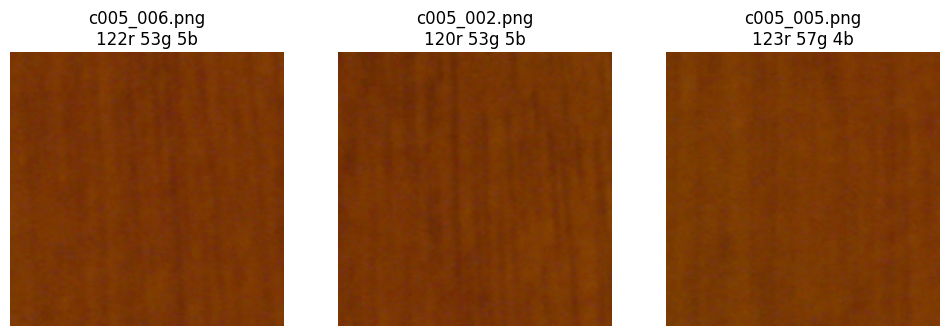


Pixel mais vermelho em c005_006.png: pos=(np.int64(74), np.int64(65)) -> 133 r 53 g 0 b


In [2]:
# Identificar as imagens mais "vermelhas" e mostrar os triplets R G B
import pandas as pd
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Caminhos esperados dos CSVs gerados pela célula de estatísticas
BASE = Path('/Users/lucas/repositories/Unicamp') / 'ms505' / 'data'
STATS_DIR = BASE / 'formated_data' / 'stats'
TRAIN_CSV = STATS_DIR / 'rgb_stats_Treino.csv'
TEST_CSV = STATS_DIR / 'rgb_stats_Teste.csv'

# Carrega df_train (se já estiver em memória, usa-o), senão tenta ler CSV
if 'df_train' in globals():
    df_train = globals()['df_train']
else:
    if TRAIN_CSV.exists():
        df_train = pd.read_csv(TRAIN_CSV)
    else:
        raise FileNotFoundError(f"Arquivo de estatísticas não encontrado: {TRAIN_CSV}. Execute a célula de processamento primeiro.")

# Função utilitária para formatar triplet
def format_triplet(row):
    r = int(round(row['mean_R']))
    g = int(round(row['mean_G']))
    b = int(round(row['mean_B']))
    return f"{r} r {g} g {b} b"

# Métricas de 'vermelhidão'
# 1) diferença absoluta: mean_R - max(mean_G, mean_B)
df_train['redness_diff'] = df_train['mean_R'] - df_train[['mean_G','mean_B']].max(axis=1)
# 2) razão relativa: mean_R / (mean_R+mean_G+mean_B)
df_train['red_ratio'] = df_train['mean_R'] / (df_train['mean_R'] + df_train['mean_G'] + df_train['mean_B'] + 1e-9)

# Top K por diferença e por razão
TOP_K = 10
print(f"Top {TOP_K} imagens por diferenÃ§a (R - max(G,B)):")
for _, row in df_train.sort_values('redness_diff', ascending=False).head(TOP_K).iterrows():
    print(f"{row['filename']}: {format_triplet(row)}  (diff={row['redness_diff']:.1f})")

print('\nTop {0} imagens por proporção de vermelho (R/(R+G+B)):' .format(TOP_K))
for _, row in df_train.sort_values('red_ratio', ascending=False).head(TOP_K).iterrows():
    print(f"{row['filename']}: {format_triplet(row)}  (ratio={row['red_ratio']:.3f})")

# Opcional: mostrar as 3 imagens mais vermelhas (pela diferença) inline
def show_images(rows, folder='Treino', ncols=3, figsize=(12,4)):
    imgs = []
    for _, r in rows.iterrows():
        path = Path(r['filepath']) if 'filepath' in r and pd.notna(r['filepath']) else (BASE / 'original_data' / folder / r['filename'])
        if path.exists():
            imgs.append((path, r))
    if not imgs:
        print('Nenhuma imagem encontrada para exibir.')
        return
    n = min(len(imgs), ncols)
    plt.figure(figsize=figsize)
    for i, (p, r) in enumerate(imgs[:n]):
        im = Image.open(p).convert('RGB')
        ax = plt.subplot(1, n, i+1)
        plt.imshow(im)
        plt.axis('off')
        ax.set_title(f"{r['filename']}\n{int(round(r['mean_R']))}r {int(round(r['mean_G']))}g {int(round(r['mean_B']))}b")
    plt.show()

# Mostrar as 3 primeiras mais vermelhas por diff
top_rows = df_train.sort_values('redness_diff', ascending=False).head(3)
show_images(top_rows, folder='Treino', ncols=3)

# Função para obter o pixel mais vermelho de uma imagem (score simples)
def most_red_pixel(path):
    im = Image.open(path).convert('RGB')
    arr = np.array(im).astype(np.int32)
    R = arr[...,0]; G = arr[...,1]; B = arr[...,2]
    score = R - (G + B) / 2.0
    idx = np.unravel_index(np.argmax(score), score.shape)
    r,g,b = arr[idx][0], arr[idx][1], arr[idx][2]
    return idx, (int(r), int(g), int(b))

# Exemplo de uso da funÃ§Ã£o most_red_pixel para a imagem mais vermelha
most_red_file = df_train.sort_values('redness_diff', ascending=False).iloc[0]['filename']
most_red_path = BASE / 'original_data' / 'Treino' / most_red_file
if most_red_path.exists():
    idx, (r,g,b) = most_red_pixel(most_red_path)
    print(f"\nPixel mais vermelho em {most_red_file}: pos={idx} -> {r} r {g} g {b} b")
else:
    print(f"\nArquivo nÃ£o encontrado para pixel mais vermelho: {most_red_path}")


In [3]:
# Imprimir cores (triplets RGB médios) para pares especificados
from pathlib import Path
from PIL import Image
import numpy as np

BASE = Path('/Users/lucas/repositories/Unicamp') / 'ms505' / 'data'
TEST_DIR = BASE / 'original_data' / 'Teste'
TRAIN_DIR = BASE / 'original_data' / 'Treino'

pairs = [
    ("c004_012.png", "c009_004.png"),
    ("c008_011.png", "c010_006.png"),
    ("c008_012.png", "c010_006.png"),
]


def mean_rgb(path: Path):
    if not path.exists():
        return None
    with Image.open(path) as im:
        im = im.convert('RGB')
        arr = np.asarray(im).astype(np.float32)
    R = arr[...,0].mean()
    G = arr[...,1].mean()
    B = arr[...,2].mean()
    return (int(round(R)), int(round(G)), int(round(B)))

for test_name, train_name in pairs:
    test_path = TEST_DIR / test_name
    train_path = TRAIN_DIR / train_name

    test_rgb = mean_rgb(test_path)
    train_rgb = mean_rgb(train_path)

    print(f"Imagem de teste: {test_name}")
    if test_rgb is None:
        print(f"  Arquivo não encontrado: {test_path}")
    else:
        print(f"  Média: {test_rgb[0]} r {test_rgb[1]} g {test_rgb[2]} b")

    print(f"Imagem de treino associada: {train_name}")
    if train_rgb is None:
        print(f"  Arquivo não encontrado: {train_path}")
    else:
        print(f"  Média: {train_rgb[0]} r {train_rgb[1]} g {train_rgb[2]} b")

    print("-")


Imagem de teste: c004_012.png
  Média: 107 r 98 g 94 b
Imagem de treino associada: c009_004.png
  Média: 132 r 73 g 3 b
-
Imagem de teste: c008_011.png
  Média: 23 r 19 g 7 b
Imagem de treino associada: c010_006.png
  Média: 114 r 54 g 6 b
-
Imagem de teste: c008_012.png
  Média: 21 r 18 g 7 b
Imagem de treino associada: c010_006.png
  Média: 114 r 54 g 6 b
-
